# DATA CLEANING AND VISUALIZATION

PROJECT TAKEN FROM KAGGLE, keeping up the knowledge 

Libraries that I work with:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Checking what is the DataFrame is about:

In [2]:
nf = pd.read_csv('netflix1.csv')  
nf.head()

,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


### Cleaning process :

In [3]:
nf.duplicated().value_counts()  # Sin duplicados

False    8790
dtype: int64

In [4]:
nf.columns

Index(['show_id', 'type', 'title', 'director', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in'],
      dtype='object')

In [5]:
nf = nf.rename(columns=lambda x: x.capitalize())
nf.columns

Index(['Show_id', 'Type', 'Title', 'Director', 'Country', 'Date_added',
       'Release_year', 'Rating', 'Duration', 'Listed_in'],
      dtype='object')

In [6]:
nf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       8790 non-null   object
 1   Type          8790 non-null   object
 2   Title         8790 non-null   object
 3   Director      8790 non-null   object
 4   Country       8790 non-null   object
 5   Date_added    8790 non-null   object
 6   Release_year  8790 non-null   int64 
 7   Rating        8790 non-null   object
 8   Duration      8790 non-null   object
 9   Listed_in     8790 non-null   object
dtypes: int64(1), object(9)
memory usage: 686.8+ KB


In [7]:
nf.Listed_in.value_counts()

Dramas, International Movies                                362
Documentaries                                               359
Stand-Up Comedy                                             334
Comedies, Dramas, International Movies                      274
Dramas, Independent Movies, International Movies            252
                                                           ... 
Anime Features                                                1
Action & Adventure, Horror Movies, Independent Movies         1
Action & Adventure, Classic Movies, International Movies      1
Cult Movies, Independent Movies, Thrillers                    1
Classic & Cult TV, Crime TV Shows, TV Dramas                  1
Name: Listed_in, Length: 513, dtype: int64

In [8]:
by_country = nf['Country'].value_counts()
by_country.head(45) 

United States           3240
India                   1057
United Kingdom           638
Pakistan                 421
Not Given                287
Canada                   271
Japan                    259
South Korea              214
France                   213
Spain                    182
Mexico                   138
Egypt                    123
Australia                114
Turkey                   112
Nigeria                  105
Germany                  104
China                    100
Brazil                    88
Taiwan                    86
Indonesia                 86
Philippines               83
Hong Kong                 79
Argentina                 76
Italy                     66
Thailand                  66
Colombia                  42
South Africa              42
Denmark                   30
Poland                    30
Netherlands               28
Ireland                   28
Singapore                 28
Lebanon                   24
Malaysia                  23
Israel        

In [9]:
by_country.tail(41)

Uruguay           9
Switzerland       8
Vietnam           7
Kuwait            7
Peru              6
Finland           6
Iceland           6
Czech Republic    6
Hungary           5
Bulgaria          5
Kenya             4
Ghana             4
Portugal          4
Bangladesh        3
Serbia            3
Jordan            2
Croatia           2
Venezuela         2
Georgia           2
Cambodia          2
Ukraine           2
Mauritius         2
Syria             2
Paraguay          1
Somalia           1
Cyprus            1
Puerto Rico       1
Belarus           1
Senegal           1
Luxembourg        1
Namibia           1
Cameroon          1
Jamaica           1
Guatemala         1
Slovenia          1
Mozambique        1
Iran              1
West Germany      1
Greece            1
Zimbabwe          1
Soviet Union      1
Name: Country, dtype: int64

In [10]:
column_to_check = 'Country'

Not_given = nf[nf[column_to_check] == 'Not Given']
Not_given.head(45)


,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
25,s17,Movie,Europe's Most Dangerous Man: Otto Skorzeny in ...,"Pedro de Echave García, Pablo Azorín Williams",Not Given,9/22/2021,2020,TV-MA,67 min,"Documentaries, International Movies"
26,s7930,Movie,Samudri Lootere,Anirban Majumder,Not Given,6/18/2019,2018,TV-Y,65 min,Children & Family Movies
52,s19,Movie,Intrusion,Adam Salky,Not Given,9/22/2021,2021,TV-14,94 min,Thrillers
53,s23,Movie,Avvai Shanmughi,K.S. Ravikumar,Not Given,9/21/2021,1996,TV-PG,161 min,"Comedies, International Movies"
54,s31,Movie,Ankahi Kahaniya,"Ashwiny Iyer Tiwari, Abhishek Chaubey, Saket C...",Not Given,9/17/2021,2021,TV-14,111 min,"Dramas, Independent Movies, International Movies"
55,s36,Movie,The Father Who Moves Mountains,Daniel Sandu,Not Given,9/17/2021,2021,TV-MA,110 min,"Dramas, International Movies, Thrillers"
56,s37,Movie,The Stronghold,Cédric Jimenez,Not Given,9/17/2021,2021,TV-MA,105 min,"Action & Adventure, Dramas, International Movies"
80,s46,Movie,My Heroes Were Cowboys,Tyler Greco,Not Given,9/16/2021,2021,PG,23 min,Documentaries


In [11]:
filtered_rows = nf[nf.apply(lambda row: row.astype(str).str.contains('Not Given', case=False).any(), axis=1)]
filtered_rows

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Listed_in
12,s852,Movie,99 Songs (Tamil),Not Given,Pakistan,5/21/2021,2021,TV-14,131 min,"Dramas, International Movies, Music & Musicals"
17,s4,TV Show,Jailbirds New Orleans,Not Given,Pakistan,9/24/2021,2021,TV-MA,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,Not Given,Pakistan,9/22/2021,2021,TV-MA,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
23,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha",Not Given,9/24/2021,2021,PG,91 min,Children & Family Movies
24,s12,TV Show,Bangkok Breaking,Kongkiat Komesiri,Not Given,9/23/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
...,...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,Not Given,Turkey,1/17/2017,2016,TV-PG,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,Not Given,United States,9/13/2018,2016,TV-Y7,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,Not Given,Pakistan,12/15/2016,2012,TV-PG,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,Not Given,Pakistan,6/23/2018,2016,TV-Y,1 Season,Kids' TV


In [12]:
nf.Country.replace('Not Given',np.nan,inplace=True)

In [13]:
round(nf.Country.isnull().sum()/nf.shape[0]*100,2)

3.27

In [14]:
nf.Director.replace('Not Given',np.nan,inplace=True)
round(nf.Director.isnull().sum()/nf.shape[0]*100,2)

29.44

In [2]:
rows_with_no_data = 8789

# Define the percentage of "no data" rows
percentage_no_data = 29.44

# Calculate the total number of rows
total_rows = rows_with_no_data / (percentage_no_data / 100)

# Print the total number of rows
print("Total Number of Rows:", int(total_rows))

Total Number of Rows: 29853


In [15]:
nf = nf.rename(columns={'Listed_in': 'Category'})
nf.head(10)

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Rating,Duration,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,TV-14,9 Seasons,"British TV Shows, Reality TV"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,PG-13,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,TV-Y7,87 min,"Children & Family Movies, Comedies, Music & Mu..."
8,s13,Movie,Je Suis Karl,Christian Schwochow,Germany,9/23/2021,2021,TV-MA,127 min,"Dramas, International Movies"
9,s940,Movie,Motu Patlu in Wonderland,Suhas Kadav,India,5/1/2021,2013,TV-Y7,76 min,"Children & Family Movies, Music & Musicals"


In [16]:
nf.Type.value_counts()

Movie      6126
TV Show    2664
Name: Type, dtype: int64

In [17]:
nf.Rating.value_counts()

TV-MA       3205
TV-14       2157
TV-PG        861
R            799
PG-13        490
TV-Y7        333
TV-Y         306
PG           287
TV-G         220
NR            79
G             41
TV-Y7-FV       6
NC-17          3
UR             3
Name: Rating, dtype: int64

In [18]:
nf = nf.drop('Rating', axis=1)
nf.head(2)

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."


## Breaking the DataFrame in to two - TV Shows & Movies

In [19]:
Netflix_TvShow = nf[nf['Type'] == 'TV Show']
Netflix_TvShow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2664 entries, 1 to 8789
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       2664 non-null   object
 1   Type          2664 non-null   object
 2   Title         2664 non-null   object
 3   Director      249 non-null    object
 4   Country       2634 non-null   object
 5   Date_added    2664 non-null   object
 6   Release_year  2664 non-null   int64 
 7   Duration      2664 non-null   object
 8   Category      2664 non-null   object
dtypes: int64(1), object(8)
memory usage: 208.1+ KB


In [20]:
Netflix_movie = nf[nf['Type'] == 'Movie']
Netflix_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6126 entries, 0 to 8783
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_id       6126 non-null   object
 1   Type          6126 non-null   object
 2   Title         6126 non-null   object
 3   Director      5953 non-null   object
 4   Country       5869 non-null   object
 5   Date_added    6126 non-null   object
 6   Release_year  6126 non-null   int64 
 7   Duration      6126 non-null   object
 8   Category      6126 non-null   object
dtypes: int64(1), object(8)
memory usage: 478.6+ KB


In [21]:
Netflix_movie

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Category
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,90 min,Documentaries
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,125 min,"Dramas, Independent Movies, International Movies"
6,s10,Movie,The Starling,Theodore Melfi,United States,9/24/2021,2021,104 min,"Comedies, Dramas"
7,s939,Movie,Motu Patlu in the Game of Zones,Suhas Kadav,India,5/1/2021,2019,87 min,"Children & Family Movies, Comedies, Music & Mu..."
...,...,...,...,...,...,...,...,...,...
8702,s8232,Movie,The Bund,NaN,Hong Kong,9/20/2018,1983,103 min,"Action & Adventure, Dramas, International Movies"
8707,s8269,Movie,The Darkest Dawn,NaN,United Kingdom,6/23/2018,2016,75 min,"Action & Adventure, Independent Movies, Intern..."
8716,s8331,Movie,The Great Battle,NaN,South Korea,4/8/2019,2018,136 min,"Action & Adventure, Dramas, International Movies"
8763,s8648,Movie,"Twisted Trunk, Big Fat Body",NaN,India,1/15/2017,2015,89 min,"Dramas, International Movies"


In [22]:
Netflix_TvShow

,Show_id,Type,Title,Director,Country,Date_added,Release_year,Duration,Category
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,1 Season,"TV Dramas, TV Horror, TV Mysteries"
5,s9,TV Show,The Great British Baking Show,Andy Devonshire,United Kingdom,9/24/2021,2021,9 Seasons,"British TV Shows, Reality TV"
17,s4,TV Show,Jailbirds New Orleans,NaN,Pakistan,9/24/2021,2021,1 Season,"Docuseries, Reality TV"
18,s15,TV Show,Crime Stories: India Detectives,NaN,Pakistan,9/22/2021,2021,1 Season,"British TV Shows, Crime TV Shows, Docuseries"
...,...,...,...,...,...,...,...,...,...
8785,s8797,TV Show,Yunus Emre,NaN,Turkey,1/17/2017,2016,2 Seasons,"International TV Shows, TV Dramas"
8786,s8798,TV Show,Zak Storm,NaN,United States,9/13/2018,2016,3 Seasons,Kids' TV
8787,s8801,TV Show,Zindagi Gulzar Hai,NaN,Pakistan,12/15/2016,2012,1 Season,"International TV Shows, Romantic TV Shows, TV ..."
8788,s8784,TV Show,Yoko,NaN,Pakistan,6/23/2018,2016,1 Season,Kids' TV


# VISUALIZATION - Breaking down the analisys 

### TV show - top 10 Countries

In [23]:
TV_top_10_countries=Netflix_TvShow.Country.value_counts(ascending=False).head(10)
TV_top_10_countries

United States     845
Pakistan          350
United Kingdom    251
Japan             172
South Korea       165
Canada             84
India              81
Taiwan             71
France             65
Australia          53
Name: Country, dtype: int64

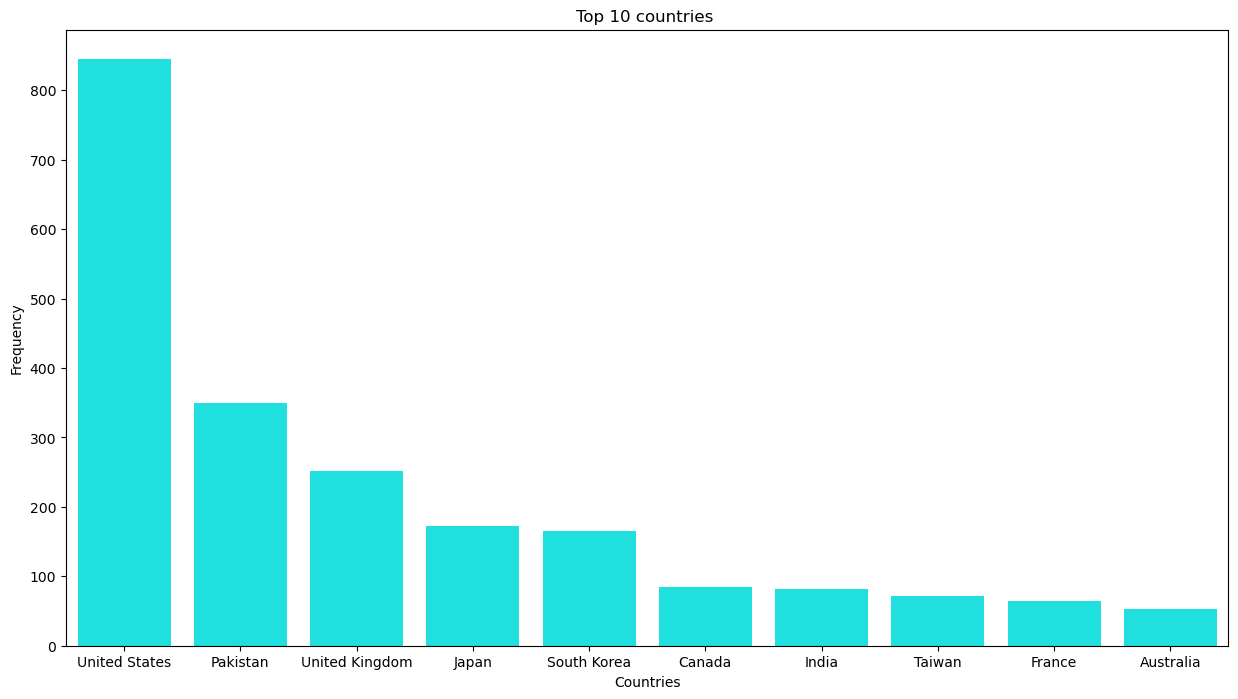

In [24]:
plt.figure(figsize=(15,8))
sns.barplot(x=TV_top_10_countries.index, y=TV_top_10_countries.values,color='cyan')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Top 10 countries ')
plt.show()

### Movies - top 10 Countries

In [25]:
Mov_top_10_countries=Netflix_movie.Country.value_counts(ascending=False).head(10)
Mov_top_10_countries

United States     2395
India              976
United Kingdom     387
Canada             187
France             148
Spain              129
Egypt              109
Nigeria             96
Mexico              90
Japan               87
Name: Country, dtype: int64

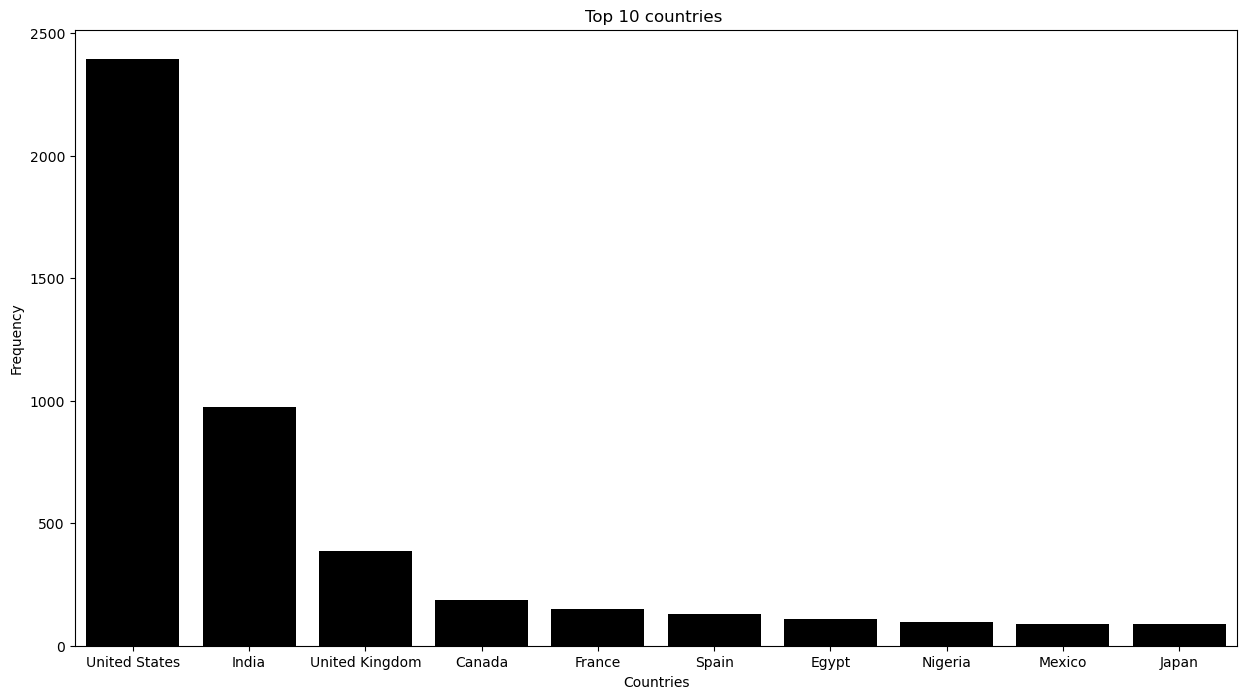

In [26]:
plt.figure(figsize=(15,8))
sns.barplot(x=Mov_top_10_countries.index, y=Mov_top_10_countries.values,color='black')
plt.xlabel('Countries')
plt.ylabel('Frequency')
plt.title('Top 10 countries ')
plt.show()

### TOP 5 DIRECTORS - MOVIE

In [30]:
Movie_top_5_directors= Netflix_movie.Director.value_counts(ascending=False).head(5)
Movie_top_5_directors.head(5)

Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              15
Jay Karas                 14
Name: Director, dtype: int64

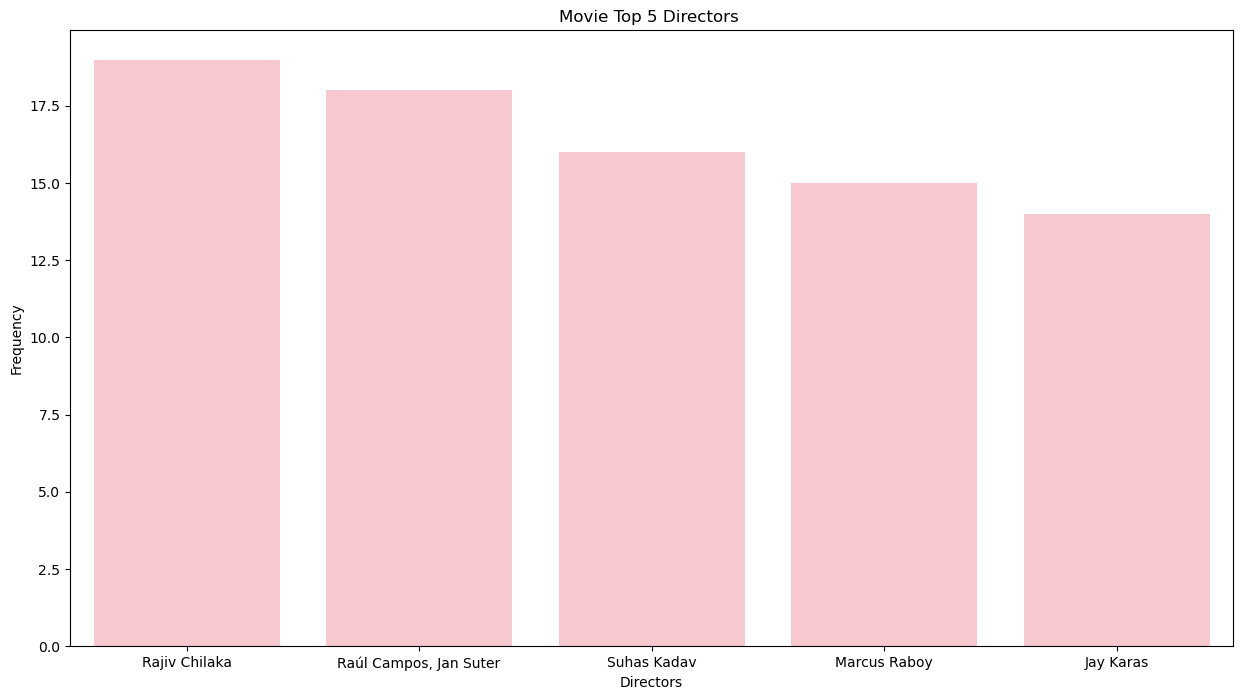

In [33]:
plt.figure(figsize=(15,8))
sns.barplot(x=Movie_top_5_directors.index, y=Movie_top_5_directors.values,color='pink')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.title('Movie Top 5 Directors ')
plt.show()

### TOP 5 DIRECTORS - TV SHOWS

In [34]:
TVShow_top_5_directors= Netflix_TvShow.Director.value_counts(ascending=False).head(5)
TVShow_top_5_directors.head(5)

Alastair Fothergill             14
Mark Thornton, Todd Kauffman     5
Stan Lathan                      3
Iginio Straffi                   2
Rob Seidenglanz                  2
Name: Director, dtype: int64

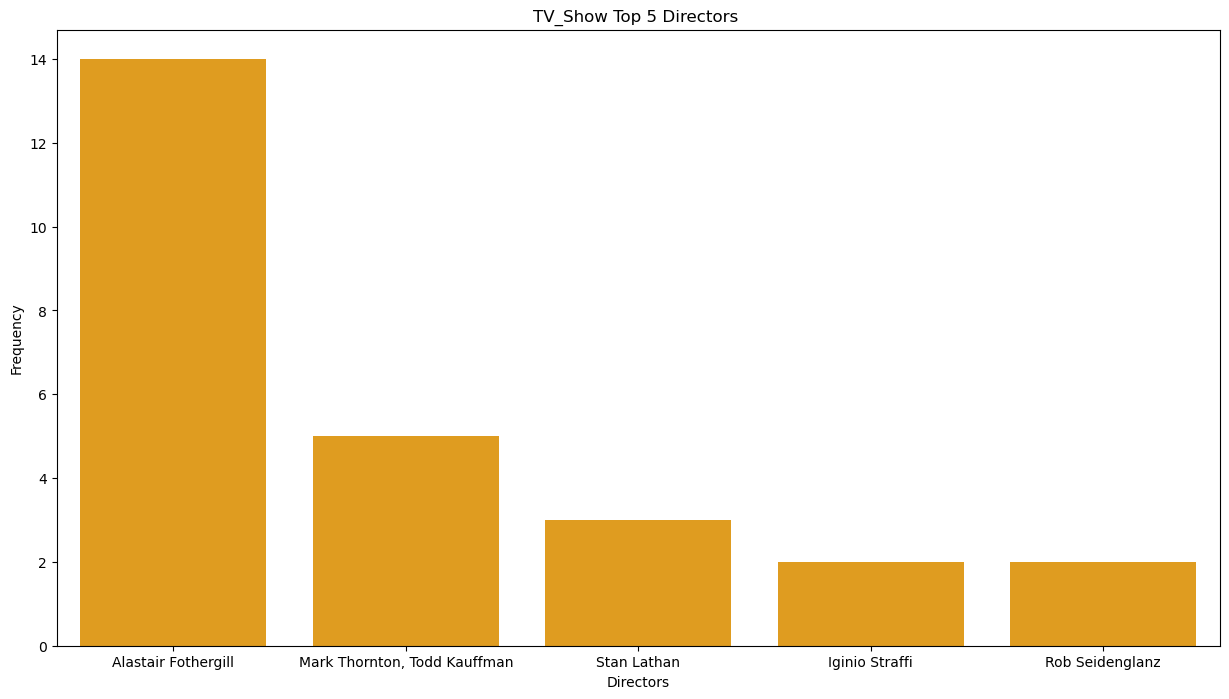

In [35]:
plt.figure(figsize=(15,8))
sns.barplot(x=TVShow_top_5_directors.index, y=TVShow_top_5_directors.values,color='orange')
plt.xlabel('Directors')
plt.ylabel('Frequency')
plt.title('TV_Show Top 5 Directors ')
plt.show()

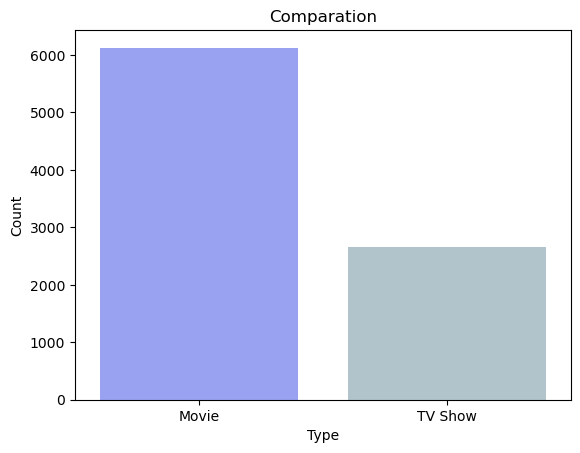

In [55]:
custom_palette = ["#8B96FF", "#AEC6CF"]
sns.countplot(x='Type', data=nf, palette=custom_palette)
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Comparation')
plt.show()

## TOP 10 CATEGORIES (including TV Show and Movies)

In [37]:
top_10_categories = nf.Category.value_counts(ascending=False).head(10)
top_10_categories

Dramas, International Movies                        362
Documentaries                                       359
Stand-Up Comedy                                     334
Comedies, Dramas, International Movies              274
Dramas, Independent Movies, International Movies    252
Kids' TV                                            219
Children & Family Movies                            215
Children & Family Movies, Comedies                  201
Documentaries, International Movies                 186
Dramas, International Movies, Romantic Movies       180
Name: Category, dtype: int64

<AxesSubplot:>

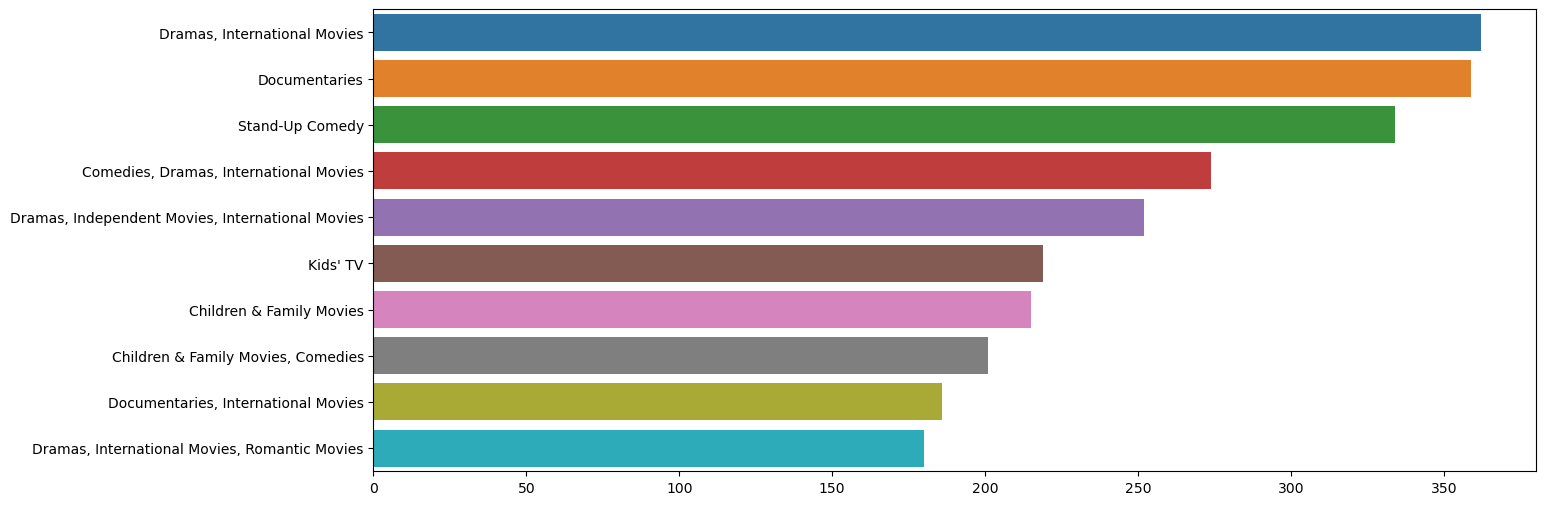

In [39]:
plt.figure(figsize=(15,6))
sns.barplot(x=top_10_categories.values,y=top_10_categories.index)

## Most Shows / Movies where released around 2020

<AxesSubplot:ylabel='Release_year'>

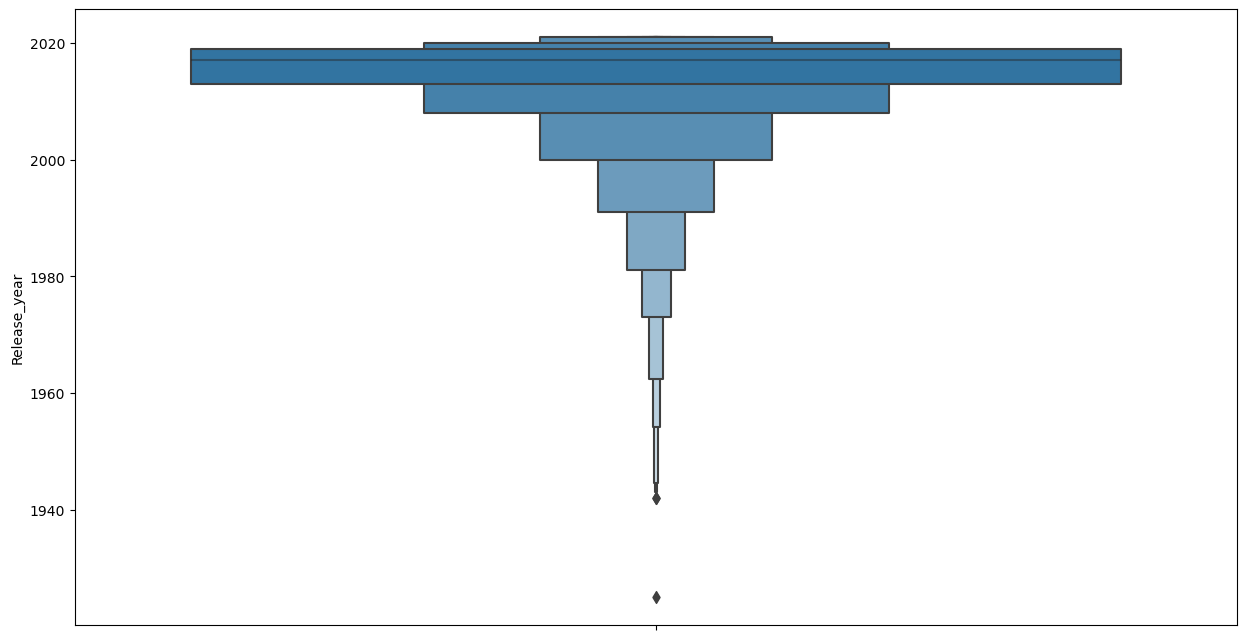

In [40]:
plt.figure(figsize=(15,8))
sns.boxenplot(y=nf['Release_year'])

## TOP 15 COUNTRIES THAT RELEASED THE MOST

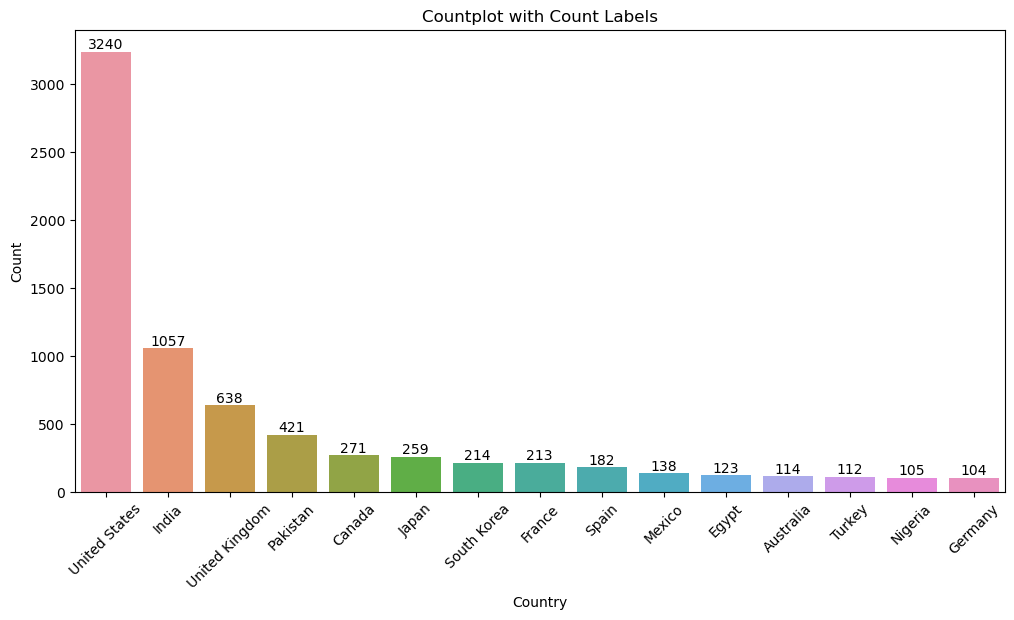

In [46]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Country', data=nf, order=nf['Country'].value_counts().index[:15])
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
plt.xticks(rotation=45)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Countplot with Count Labels')
plt.show()

## HOW MANY TV SHOWS OR MOVIES HAVE THE MOST DURATION ??

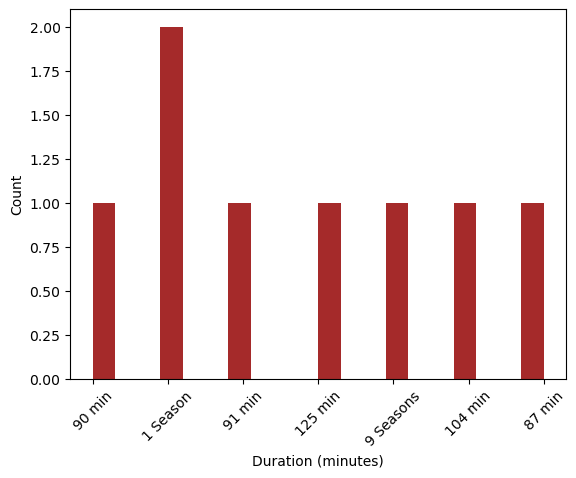

In [51]:
plt.hist(nf['Duration'].head(8), bins=20, color='brown')
plt.xlabel('Duration (minutes)')
plt.xticks(rotation=45)
plt.ylabel('Count')
plt.show()

## Released year     VS     Duration

<AxesSubplot:xlabel='Release_year', ylabel='Duration'>

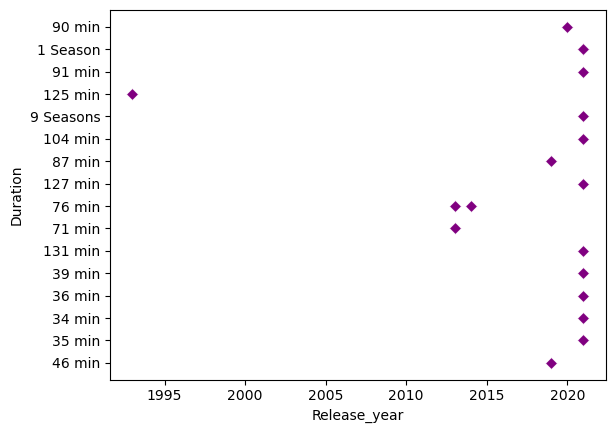

In [61]:
sns.scatterplot(x='Release_year', y='Duration', data=nf.head(20), color='purple', marker='D')